# Importar bibliotecas

In [52]:
import os
import pandas as pd
import time

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

from tqdm import tqdm


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Importar dados

In [53]:

data_folder = '/home/andre/unicamp/IC/machine_learning/reinforcement_learning/tabular_data/data/processed_data/current_testing'

paths = ['x_one_train.csv', 'y_one_train.csv','x_one_test.csv','y_one_test.csv'] 

dfs_one = []
for path in paths:
    dfs_one.append(pd.read_csv(os.path.join(data_folder,path)))

paths = ['x_mul_train.csv','y_mul_train.csv','x_mul_test.csv','y_mul_test.csv']
dfs_mul = []
for path in paths:
    dfs_mul.append(pd.read_csv(os.path.join(data_folder,path)))

paths = ['x_sur_test.csv','y_sur_test.csv']
dfs_sur = []
for path in paths:
    dfs_sur.append(pd.read_csv(os.path.join(data_folder,path)))
      


# Analise

## Instanciar classificadores

In [54]:
classificadores_one = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,),
                                   random_state=42)
}

In [55]:
one_results = pd.DataFrame()
one_results['algoritmos'] = classificadores_one.keys()
one_results.head(7)


,algoritmos
0,Naive Bayes
1,Logistic Regression
2,Random Forest
3,SVM
4,KNN
5,Decision Tree
6,MLPClassifier


In [56]:
tempo_treinamento = []
for clf in tqdm(classificadores_one.keys(), desc="Classifiers"):
    inicio = time.time()
    classificadores_one[clf].fit(dfs_one[0], dfs_one[1].values.ravel())
    fim = time.time()
    tempo_treinamento.append(fim - inicio)
one_results['tempo_treinamento'] = tempo_treinamento
one_results.head(7)


Classifiers:  86%|████████▌ | 6/7 [00:20<00:03,  3.49s/it]/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Classifiers: 100%|██████████| 7/7 [02:19<00:00, 19.98s/it]


,algoritmos,tempo_treinamento
0,Naive Bayes,0.029223
1,Logistic Regression,0.069736
2,Random Forest,0.530514
3,SVM,17.238965
4,KNN,0.041178
5,Decision Tree,2.117469
6,MLPClassifier,119.831154


In [57]:
classificadores_mul = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,),
                                   random_state=42)
}


In [58]:
mul_results = pd.DataFrame()
mul_results['algoritmos'] = classificadores_mul.keys()
mul_results.head(7)

,algoritmos
0,Naive Bayes
1,Logistic Regression
2,Random Forest
3,SVM
4,KNN
5,Decision Tree
6,MLPClassifier


In [59]:
tempo_treinamento = []
for clf in tqdm(classificadores_mul.keys(), desc="Classifiers"):
    inicio = time.time()
    classificadores_mul[clf].fit(dfs_mul[0], dfs_mul[1].values.ravel())
    fim = time.time()
    tempo_treinamento.append(fim - inicio)
mul_results['tempo_treinamento'] = tempo_treinamento
mul_results.head(7)

Classifiers:  86%|████████▌ | 6/7 [00:15<00:02,  2.84s/it]/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Classifiers: 100%|██████████| 7/7 [02:29<00:00, 21.40s/it]


,algoritmos,tempo_treinamento
0,Naive Bayes,0.063701
1,Logistic Regression,0.810205
2,Random Forest,0.805958
3,SVM,12.748678
4,KNN,0.042501
5,Decision Tree,1.330098
6,MLPClassifier,133.993498


## Avaliacao

### One attacks

In [60]:
acc_one  = []
prec_one = []
rec_one  = []
time_one = []

for clf in tqdm(classificadores_one.keys(), desc="Classifiers"):
    
    start_time = time.process_time()
    predicoes = classificadores_one[clf].predict(dfs_one[2])
    time_one.append(time.process_time() - start_time)
    
    acc_one.append(accuracy_score(dfs_one[3],predicoes))
    prec_one.append(precision_score(dfs_one[3],predicoes,average='macro'))
    rec_one.append(recall_score(dfs_one[3],predicoes,average='macro'))
    
one_results['accuracy']        = acc_one
one_results['precision']       = prec_one
one_results['recall']          = rec_one
one_results['tempo_predicoes'] = time_one

one_results.head(7)

Classifiers:   0%|          | 0/7 [00:00<?, ?it/s]

Classifiers: 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]


,algoritmos,tempo_treinamento,accuracy,precision,recall,tempo_predicoes
0,Naive Bayes,0.029223,0.826667,0.832660,0.826667,0.125872
1,Logistic Regression,0.069736,0.749944,0.754741,0.749944,0.006271
2,Random Forest,0.530514,0.710889,0.816446,0.710889,0.140574
3,SVM,17.238965,0.717944,0.752538,0.717944,0.728678
4,KNN,0.041178,0.709111,0.773698,0.709111,3.161378
5,Decision Tree,2.117469,0.784889,0.807690,0.784889,0.007428
6,MLPClassifier,119.831154,0.679778,0.730812,0.679778,0.105569


### Multiple Attacks

In [61]:
acc_mul  = []
prec_mul = []
rec_mul  = []
time_mul = []

for clf in tqdm(classificadores_mul.keys(), desc="Classifiers"):
    start_time = time.process_time()
    predicoes = classificadores_mul[clf].predict(dfs_mul[2])
    time_mul.append(time.process_time() - start_time)
    
    acc_mul.append(accuracy_score(dfs_mul[3], predicoes))
    prec_mul.append(precision_score(dfs_mul[3], predicoes, average='macro', zero_division=0))
    rec_mul.append(recall_score(dfs_mul[3], predicoes, average='macro'))

mul_results['accuracy']        = acc_mul
mul_results['precision']       = prec_mul
mul_results['recall']          = rec_mul
mul_results['tempo_predicoes'] = time_mul

mul_results.head(7)

Classifiers: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


,algoritmos,tempo_treinamento,accuracy,precision,recall,tempo_predicoes
0,Naive Bayes,0.063701,0.186722,0.191420,0.186722,0.021683
1,Logistic Regression,0.810205,0.365333,0.394738,0.365333,0.005118
2,Random Forest,0.805958,0.197278,0.182546,0.197278,0.159901
3,SVM,12.748678,0.452667,0.427016,0.452667,1.389512
4,KNN,0.042501,0.438389,0.495509,0.438389,5.379796
5,Decision Tree,1.330098,0.205722,0.256038,0.205722,0.007161
6,MLPClassifier,133.993498,0.284000,0.233855,0.284000,0.220291


### Surprise Attacks

In [62]:
sur_results = pd.DataFrame()
sur_results['algoritmos'] = classificadores_one.keys()

acc_sur  = []
prec_sur = []
rec_sur  = []
time_sur = []

for clf in tqdm(classificadores_one.keys(), desc="Classifiers"):
    
    start_time = time.process_time()
    predicoes = classificadores_one[clf].predict(dfs_sur[0])
    time_sur.append(time.process_time() - start_time)
    
    acc_sur.append(accuracy_score(dfs_sur[1],predicoes))
    prec_sur.append(precision_score(dfs_sur[1],predicoes,average='macro'))
    rec_sur.append(recall_score(dfs_sur[1],predicoes,average='macro'))
    
sur_results['accuracy']        = acc_sur
sur_results['precision']       = prec_sur
sur_results['recall']          = rec_sur
sur_results['tempo_predicoes'] = time_sur

sur_results.head(7)

Classifiers:   0%|          | 0/7 [00:00<?, ?it/s]/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

,algoritmos,accuracy,precision,recall,tempo_predicoes
0,Naive Bayes,0.927325,0.5,0.463662,0.008480
1,Logistic Regression,0.369591,0.5,0.184796,0.004273
2,Random Forest,0.300980,0.5,0.150490,0.047309
3,SVM,0.854650,0.5,0.427325,0.183684
4,KNN,0.223524,0.5,0.111762,1.144227
5,Decision Tree,0.286397,0.5,0.143199,0.002954
6,MLPClassifier,0.318193,0.5,0.159096,0.021534


## Comparar

<Axes: xlabel='recall', ylabel='algoritmos'>

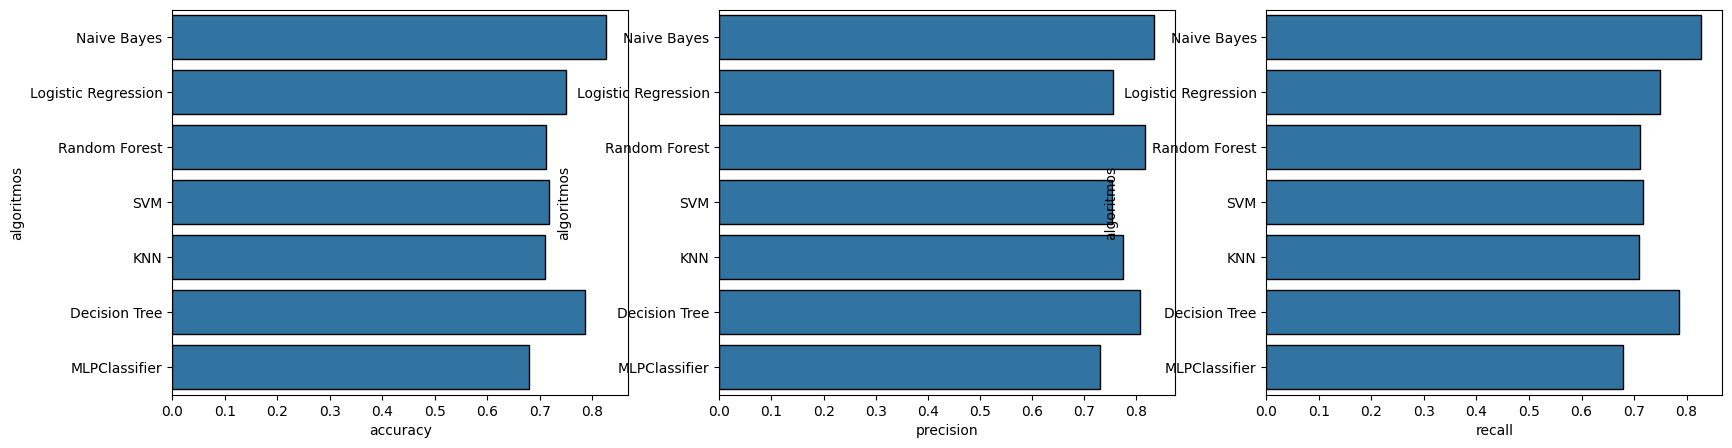

In [63]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=one_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=one_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=one_results, ax=ax[2],ec='k',orient='h')

<Axes: xlabel='recall', ylabel='algoritmos'>

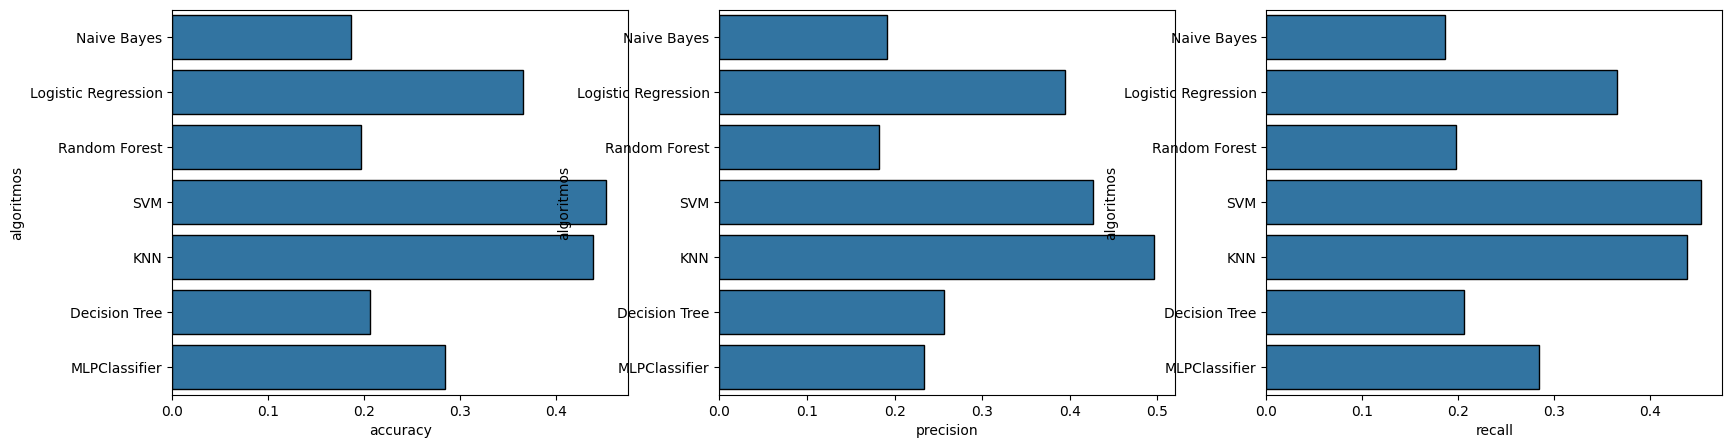

In [64]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=mul_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=mul_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=mul_results, ax=ax[2],ec='k',orient='h')

<Axes: xlabel='recall', ylabel='algoritmos'>

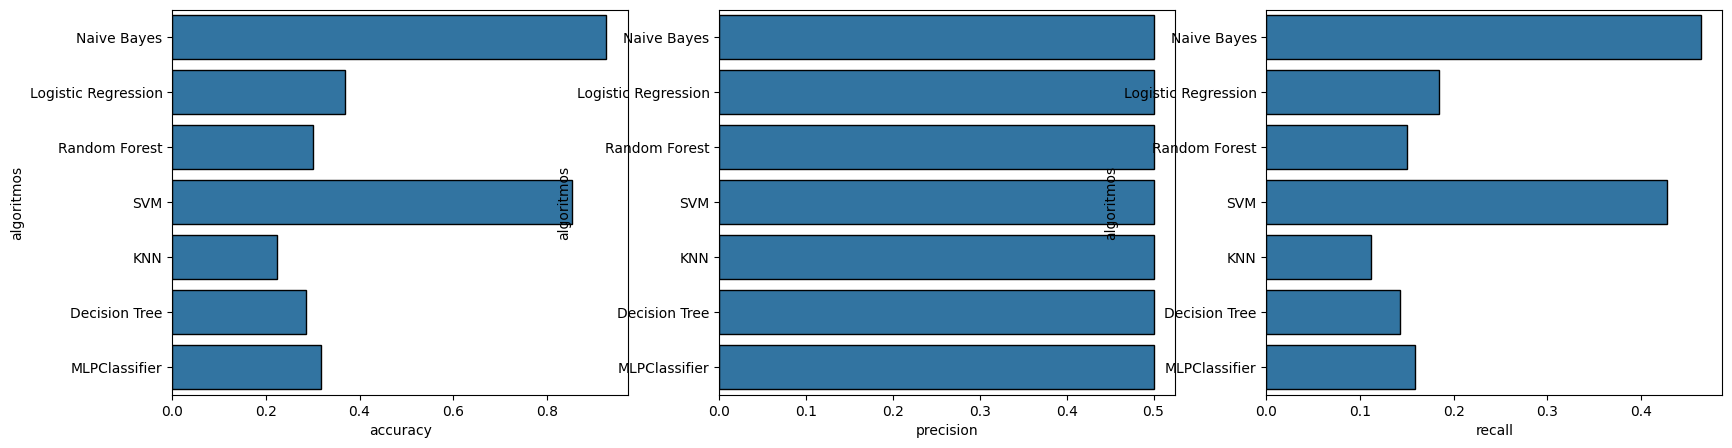

In [65]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=sur_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=sur_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=sur_results, ax=ax[2],ec='k',orient='h')

## Matriz de confusão

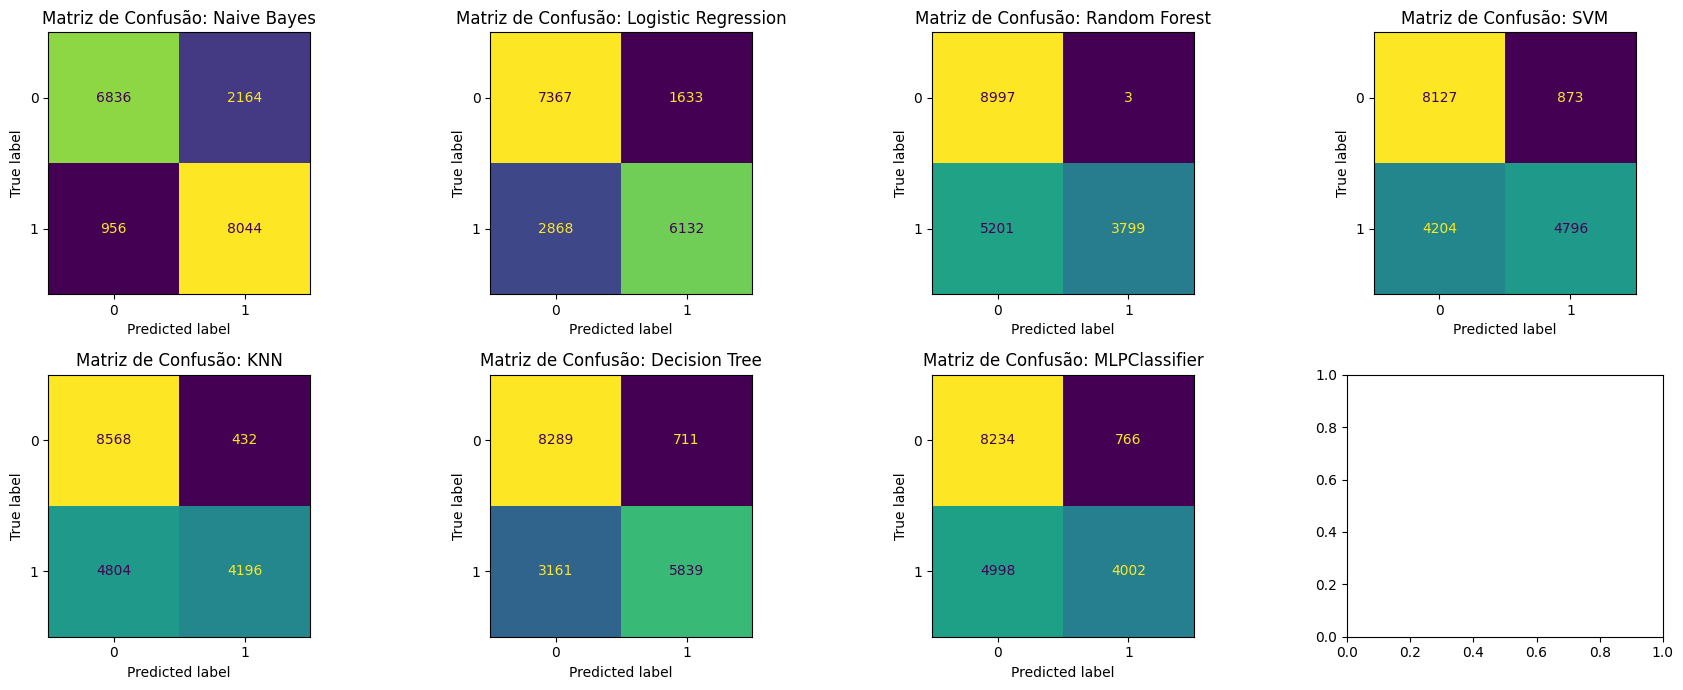

In [66]:
fig, ax = plt.subplots(nrows=2, ncols= 4, figsize=(17,7))

for idx,clf in enumerate(classificadores_one.keys()):
    cf_matrix = confusion_matrix(dfs_one[3],classificadores_one[clf].predict(dfs_one[2]))
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx//4][idx%4],colorbar=False)
    ax[idx//4][idx%4].set_title(f"Matriz de Confusão: {clf}")


plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()


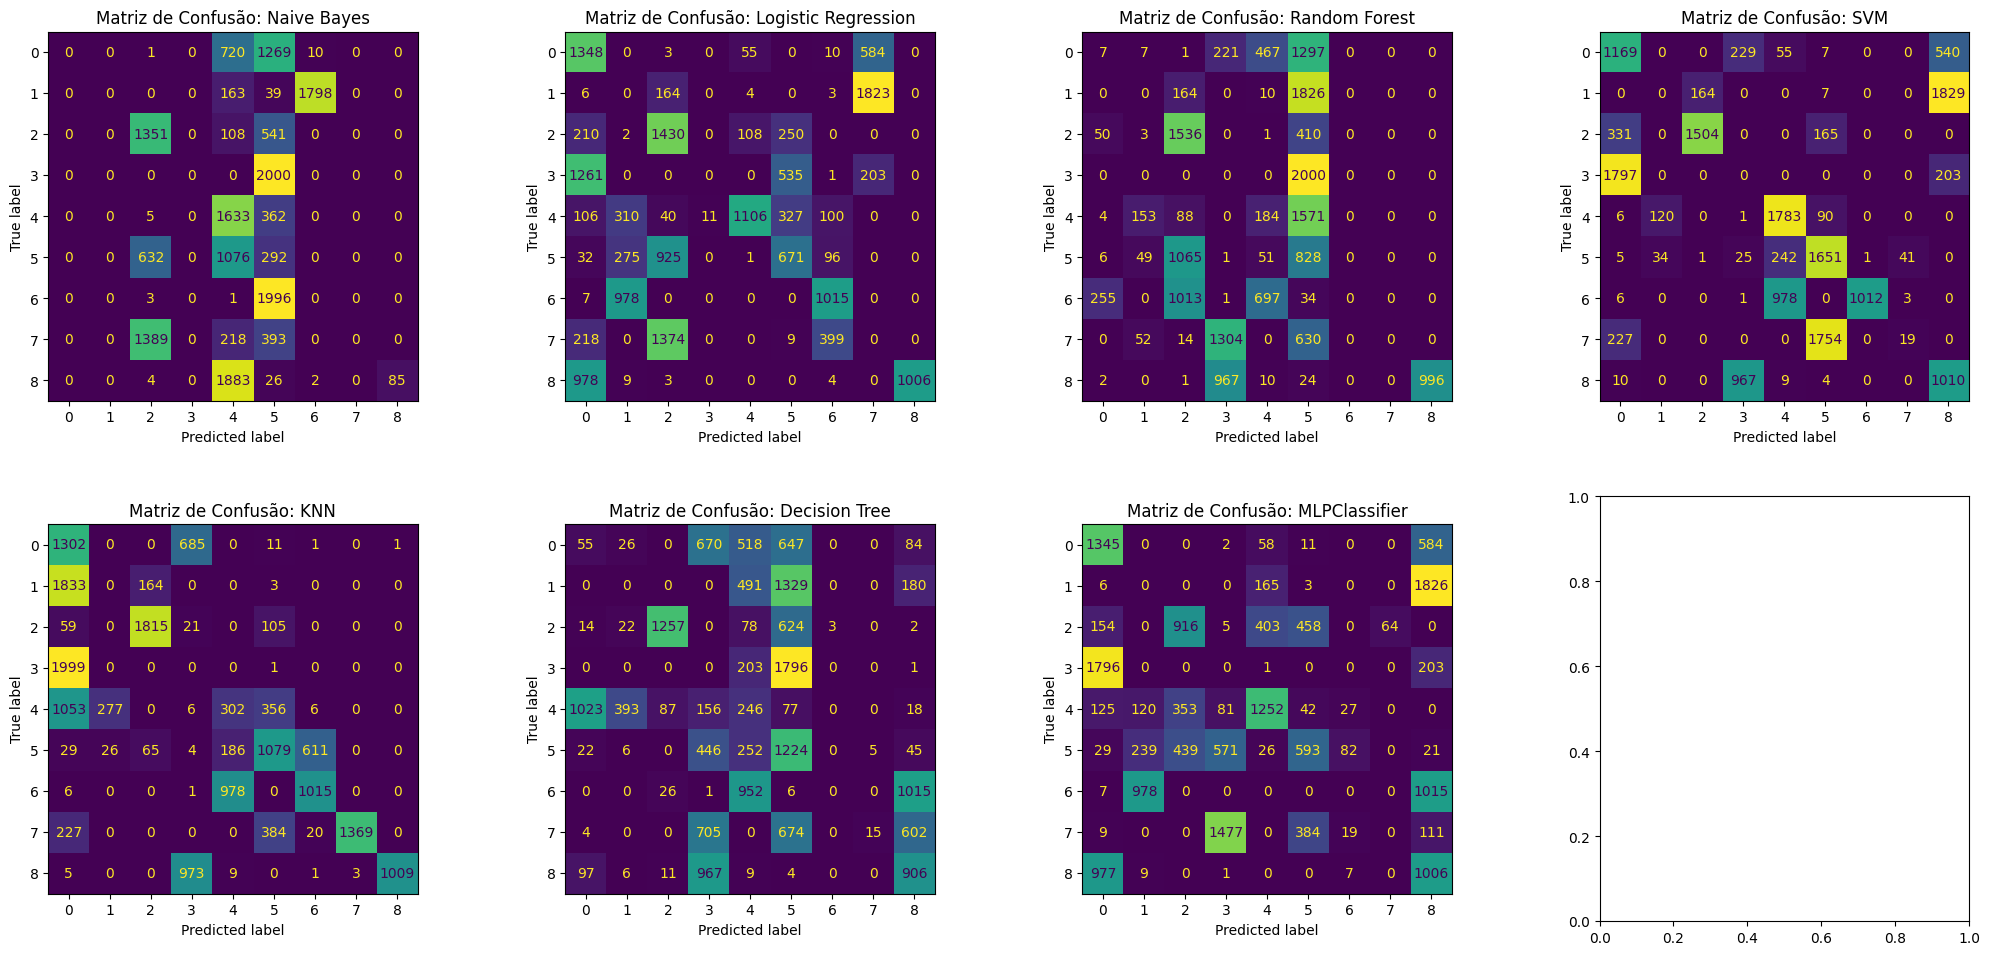

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for idx,clf in enumerate(classificadores_mul.keys()):
    cf_matrix = confusion_matrix(dfs_mul[3],classificadores_mul[clf].predict(dfs_mul[2]))
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx//4][idx%4],colorbar=False)
    ax[idx//4][idx%4].set_title(f"Matriz de Confusão: {clf}")

plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()

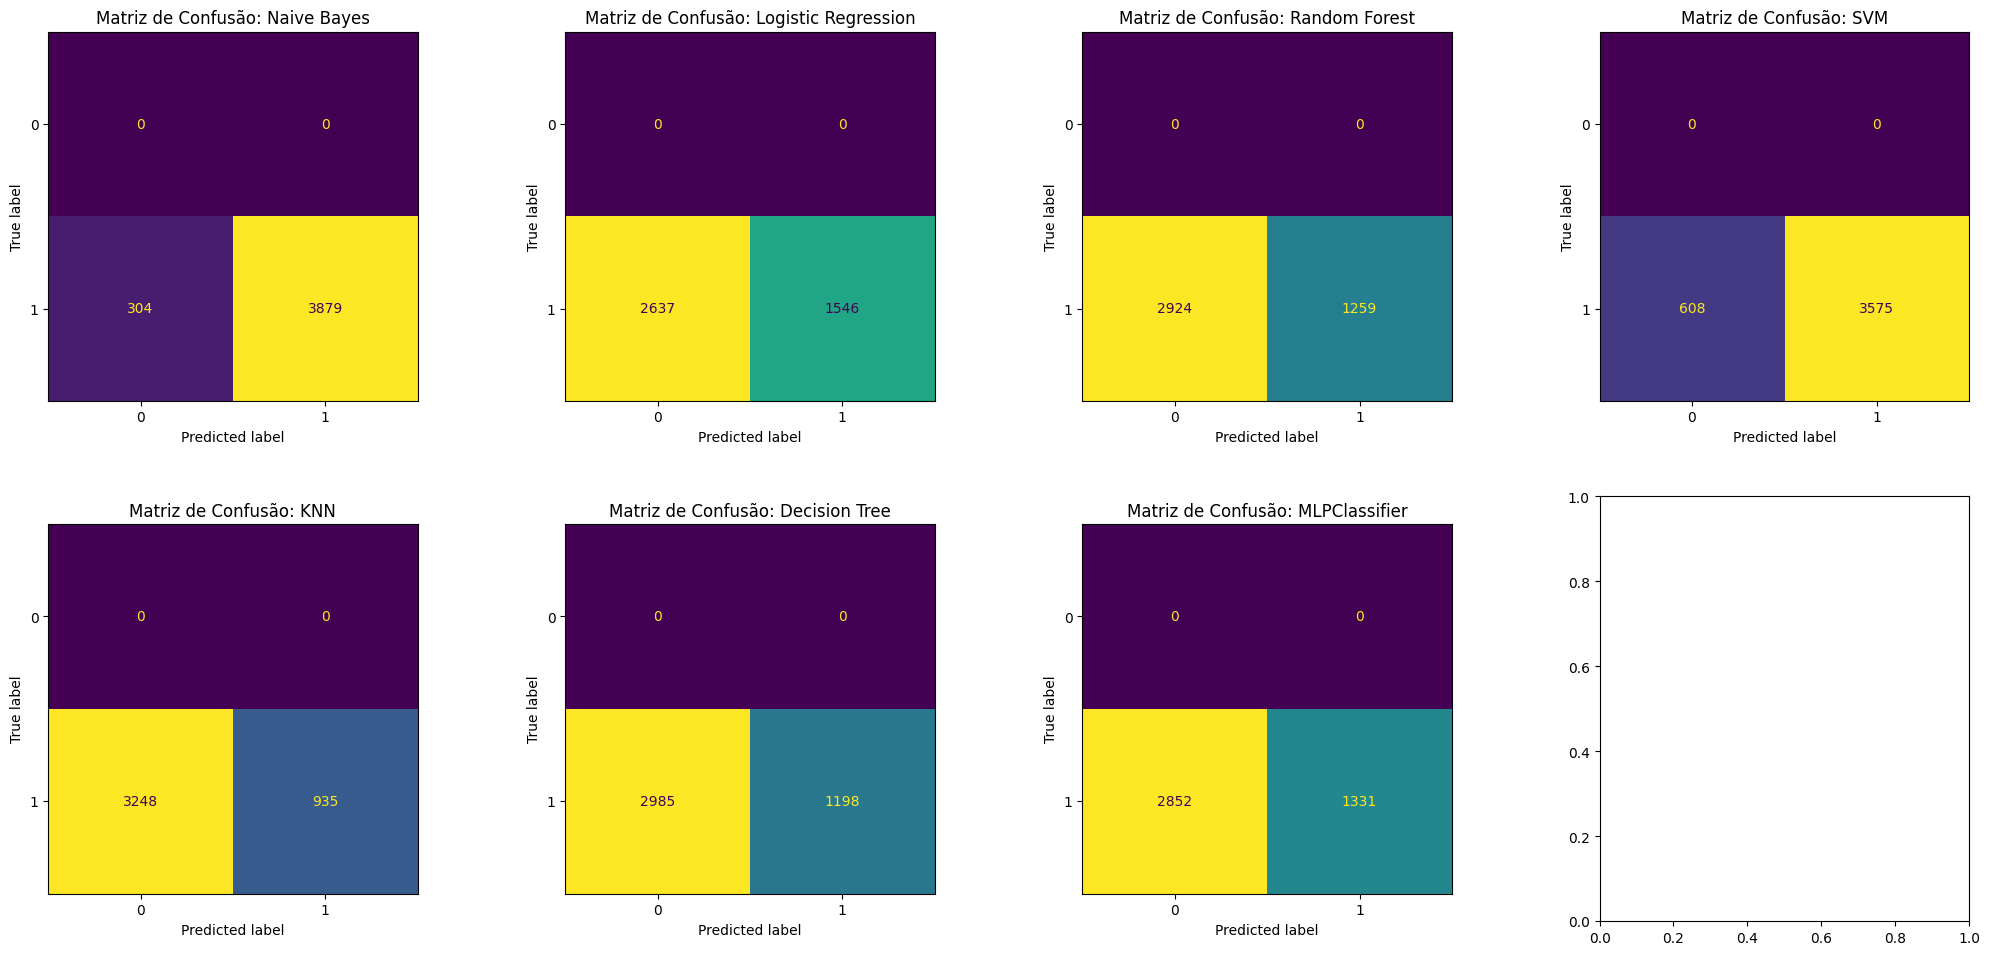

In [68]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for idx,clf in enumerate(classificadores_mul.keys()):
    cf_matrix = confusion_matrix(dfs_sur[1],classificadores_one[clf].predict(dfs_sur[0]))
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx//4][idx%4],colorbar=False)
    ax[idx//4][idx%4].set_title(f"Matriz de Confusão: {clf}")

plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()

In [69]:
# print("Classification Report: \n", classification_report(,predicoes,zero_division=0))